In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# read csvs 
fb = pd.read_csv('fb.csv')
goog = pd.read_csv('google.csv')
nflx = pd.read_csv('nflx.csv')

# concatenate dfs
glassdoor = pd.concat([fb,nflx,goog])
print(fb.shape)
print(goog.shape)
print(nflx.shape)
print(glassdoor.shape)


(5250, 8)
(14516, 8)
(713, 8)
(20479, 8)


In [5]:
# column to categorize offer between yes offer and no offer 
glassdoor['Offer Status'] = glassdoor['offer'].replace(["Accepted Offer", "Declined Offer", "No Offer"],[True, True, False])


# assign numeric value to difficulty 
glassdoor['Difficulty Score'] = glassdoor['difficulty'].replace(["Average Interview", "Difficult Interview", "Easy Interview"],[3,5,1] )

# check difficulty 
# print(glassdoor['Difficulty Score'].value_counts())
# print(glassdoor['difficulty'].value_counts())


# clean experience column for missing value and assign numerical value 
glassdoor['experience'] = glassdoor.experience.replace(["Average Interview", "Difficult Interview", "Easy Interview"],[np.nan, np.nan,np.nan])
glassdoor['Overall Experience'] = glassdoor.experience.replace(["Neutral Experience", "Positive Experience", "Negative Experience"],[3,5,1] )

# check experience 
# print(glassdoor["Overall Experience"].value_counts())
# print(glassdoor.experience.value_counts())


In [6]:
print(glassdoor["Overall Experience"].mean())
print(glassdoor["Difficulty Score"].mean())
print(glassdoor["Offer Status"].value_counts())


3.8544105194999254
3.5023682797011575
False    15372
True      5107
Name: Offer Status, dtype: int64


In [7]:
glassdoor

,company,title,date,offer,experience,difficulty,application,interview,Offer Status,Difficulty Score,Overall Experience
0,Facebook,Community Manager,"Dec 14, 2017",No Offer,Positive Experience,Average Interview,I applied through a recruiter. The process too...,It was fast. A recruiter reached out to me for...,False,3,5.0
1,Facebook,Community Organizer,"Sep 22, 2016",No Offer,Positive Experience,Average Interview,I applied through an employee referral. The pr...,It was very structured with a FB recruiter and...,False,3,5.0
2,Facebook,Computer Scientist,"Feb 9, 2016",No Offer,Neutral Experience,Average Interview,I applied through an employee referral. The pr...,You'll start out with a 55-minute interview. T...,False,3,3.0
3,Facebook,Construction Manager,"Aug 23, 2017",Declined Offer,Negative Experience,Average Interview,I applied through an employee referral. I inte...,Interview #1\nRecruiter Phone Screen with recr...,True,3,1.0
4,Facebook,Corporate Position,"Apr 24, 2019",No Offer,Negative Experience,Easy Interview,I applied in-person. I interviewed at Facebook...,I had a very good experience with the recruite...,False,1,1.0
5,Facebook,Contract Recruiter,"Feb 22, 2018",No Offer,Negative Experience,Easy Interview,I applied through a recruiter. The process too...,Was contacted by a Recruiter who did an initia...,False,1,1.0
6,Facebook,Contract Specialist,"Apr 3, 2019",Accepted Offer,Positive Experience,Average Interview,I applied through an employee referral. The pr...,First phone interview with recruiter max 30 mi...,True,3,5.0
7,Facebook,Contractor,"Mar 23, 2016",Accepted Offer,Positive Experience,Average Interview,I applied through a recruiter. The process too...,they seem rushed while interviewing but ask go...,True,3,5.0
8,Facebook,Performance Engineer,"Dec 18, 2018",No Offer,Positive Experience,Easy Interview,I applied through a recruiter. The process too...,Amazing interview experience.\nI've given so m...,False,1,5.0
9,Facebook,Performance Engineer,"Oct 17, 2017",No Offer,Negative Experience,Average Interview,I applied through a recruiter. The process too...,Not a blatant bait and switch but nearly. Olde...,False,3,1.0


In [8]:
def jobrate(x):
    return sum(x)/len(x)


print(glassdoor.groupby("company").agg('mean'))

print("-"*60)

print(np.mean(glassdoor["Offer Status"]))
print(np.mean(glassdoor["Difficulty Score"]))
print(np.mean(glassdoor["Overall Experience"]))

          Offer Status  Difficulty Score  Overall Experience
company                                                     
Facebook      0.234476          3.268571            3.721974
Google        0.252962          3.611325            3.944616
Netflix       0.286115          3.005610            2.997151
------------------------------------------------------------
0.2493774110063968
3.5023682797011575
3.8544105194999254


[Text(0, 0.5, 'Difficulty Score'), Text(0.5, 0, '')]

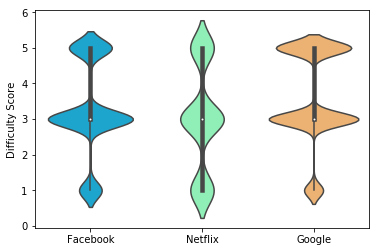

In [9]:
# How hard is it to get an offer at FNG?
fngdifficulty = sns.violinplot(x = "company", y = "Difficulty Score", data = glassdoor, palette = "rainbow")
fngdifficulty.set(xlabel= "", ylabel='Difficulty Score')

In [35]:
datasci = glassdoor[glassdoor.title == "Data Scientist"]
datasci[datasci.company == "Facebook"]

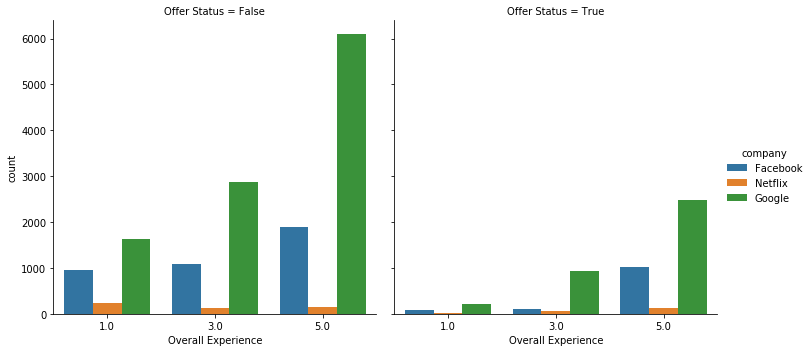

In [14]:
# how did those who received offers 
# sns.catplot(x = "Difficulty Score", hue = "Offer Status", col = "company",  data = glassdoor, kind = "count")

sns.catplot(x = "Difficulty Score", hue = "company", col = "Offer Status",  data = glassdoor, kind = "count")


# sns.catplot(x = "Overall Experience", hue = "Offer Status", col = "company",  data = glassdoor, kind = "count")

sns.catplot(x = "Overall Experience", hue = "company", col = "Offer Status",  data = glassdoor, kind = "count")


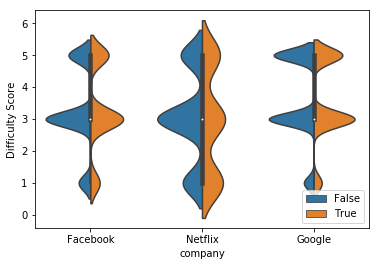

In [30]:
offerviolin = sns.violinplot(x = "company", y = "Difficulty Score", hue = "Offer Status", data = glassdoor, split = True, legend = False)
offerviolin.legend(loc = 'lower right')

In [32]:
glassdoor.date.value_counts()

Aug 27, 2019    883
Jan 6, 2020     594
Sep 18, 2019    303
Dec 30, 2019    299
Sep 17, 2019    298
Sep 1, 2019     296
Dec 24, 2019    295
Jul 27, 2016     86
Jan 24, 2017     54
Aug 2, 2016      49
Aug 5, 2016      47
Aug 4, 2016      46
Jan 22, 2017     44
Jul 30, 2016     43
Aug 18, 2016     43
Jul 29, 2016     41
Nov 5, 2015      37
Jan 21, 2015     35
Sep 4, 2013      32
Apr 17, 2019     31
Feb 17, 2014     30
Jan 17, 2019     30
Apr 1, 2019      29
Jul 10, 2019     28
Apr 12, 2019     27
May 2, 2019      27
May 14, 2019     27
May 23, 2019     27
Aug 19, 2013     26
Sep 7, 2012      26
               ... 
Oct 7, 2010       1
May 19, 2011      1
Aug 16, 2011      1
Feb 13, 2010      1
Nov 10, 2019      1
Nov 6, 2012       1
Oct 15, 2011      1
Nov 11, 2009      1
Nov 8, 2009       1
Oct 17, 2010      1
Jul 14, 2018      1
Dec 25, 2011      1
Oct 19, 2009      1
Oct 8, 2012       1
Feb 3, 2011       1
Sep 16, 2009      1
May 2, 2010       1
Aug 23, 2012      1
Dec 29, 2011      1
